In [1]:
%matplotlib inline
import plotting_Boyle as plt_B
reload(plt_B)
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
from read_model_ID import unpack_parameters
import CRISPR_free_energy_landscape as FreeEnergy
reload(FreeEnergy);
import plotting_Boyle as plt_B
reload(plt_B)
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);

import analysis_SA_fits as SAfits
reload(SAfits);

import Boyle_data_processing as Bdata
reload(Bdata);

import read_model_ID;
reload(read_model_ID);

import Weighted_Average as WA
reload(WA)

import coarsegrained_Model as cg
reload(cg)

data_folder = '../data/22_3_2019/'

In [2]:
simset = []
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,101):
    sa = pd.read_csv(data_folder + 'fit_22_3_2019_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = data_folder + 'fit_22_3_2019_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    

    
    
best_fit = simset[np.argmin(chi_squared)]
best_fit

'../data/22_3_2019/fit_22_3_2019_sim_13.txt'

## Best Fit

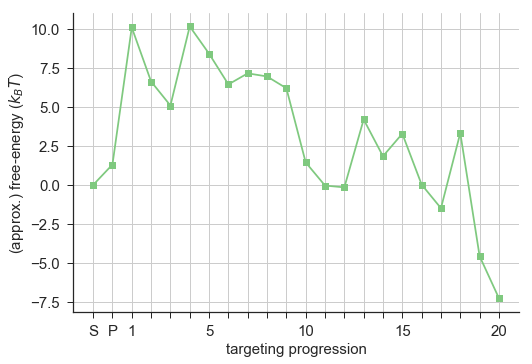

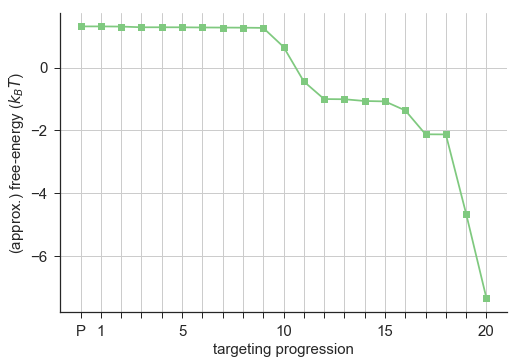

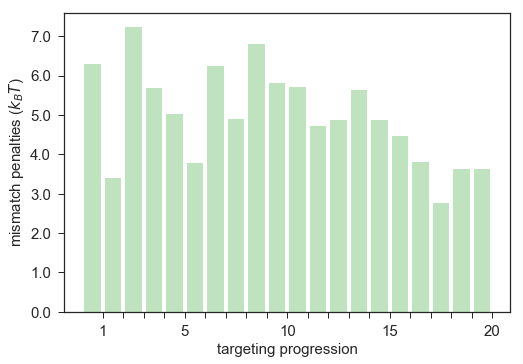

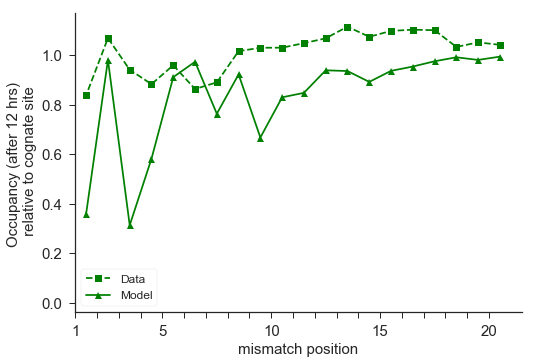

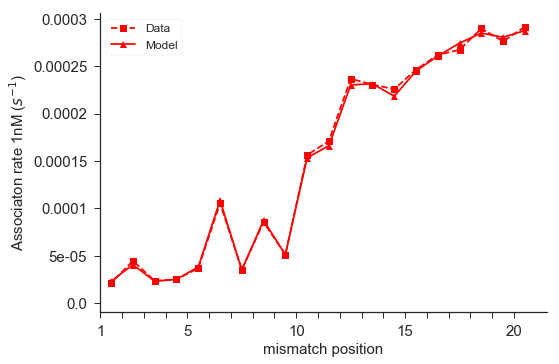

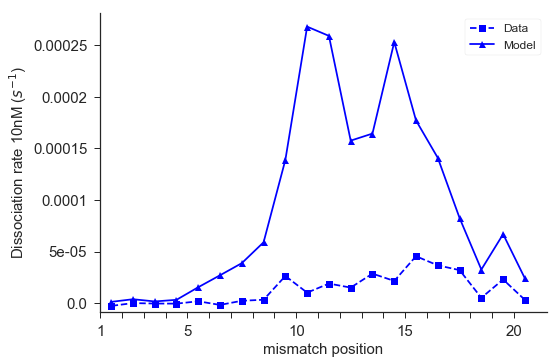

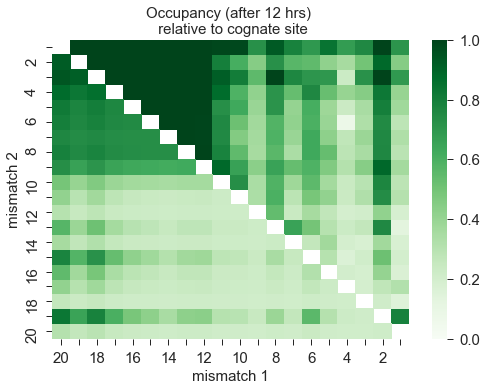

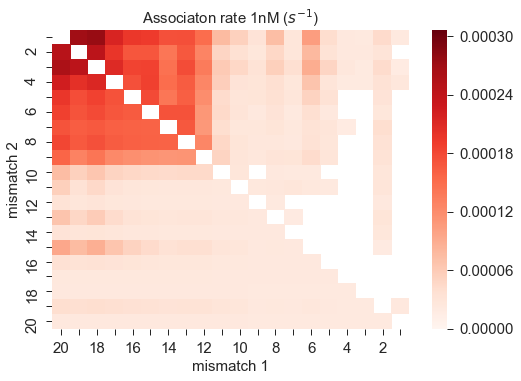

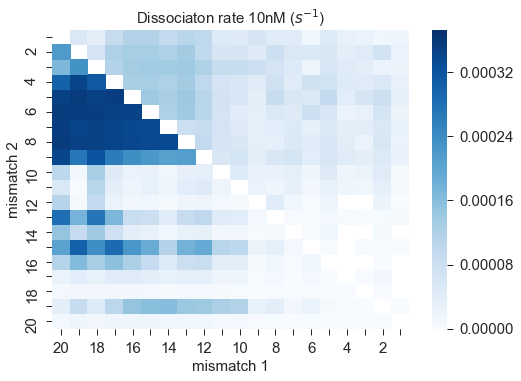

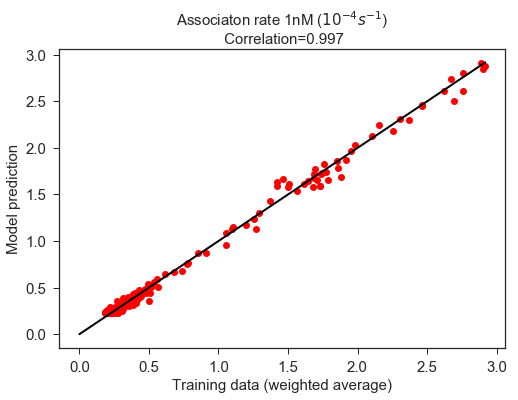

In [3]:
model_id = 'general_energies_no_kPR'
# filename = simset[np.argsort(chi_squared)[3]]
# filename = simset[0]
filename = best_fit
Nparams = 43
parameters = plt_B.load_simm_anneal(filename, Nparams)




Model_pbound, Model_on, Model_off = plt_B.calc_predictions(parameters,model_id)


Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id);

plt.figure()
FreeEnergy.plot_mismatch_penalties(parameters, model_id)


plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_pbound ,kind='Occupancy')

plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_on ,kind='OnRate')

plt.figure()
_,_ = plt_B.plot_single_mismatches(Model_off ,kind='OffRate')

plt.figure()
_,_ = plt_B.plot_heatmap(Model_pbound ,kind='Occupancy')

plt.figure()
best_model,_ = plt_B.plot_heatmap(Model_on ,kind='OnRate')

plt.figure()
_,_ = plt_B.plot_heatmap(Model_off ,kind='OffRate')

plt.figure()
_,_,_ = WA.predict_train(parameters)

## Selection (scores are calculated based n the weighted avarage of the data)

In [4]:
selected_sims, selected_scores, scores = SAfits.select_on_prediction_WA(simset,percentage=0.1)

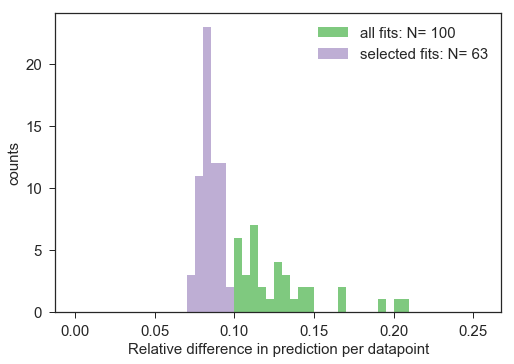

In [5]:
plt.hist(scores, normed=False, bins=np.arange(0,np.max(scores),0.005), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,np.max(scores),0.005), label='selected fits: N= ' +str(len(selected_scores)));
plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

In [7]:
np.sort(scores )

array([ 0.07367435,  0.07392573,  0.07474717,  0.07518329,  0.07545823,
        0.07551283,  0.0769669 ,  0.07760297,  0.07794207,  0.07912834,
        0.07926731,  0.07942258,  0.07955049,  0.07956081,  0.08000458,
        0.08001586,  0.08045652,  0.08049853,  0.08051943,  0.08091874,
        0.08099987,  0.08120955,  0.08144863,  0.08188025,  0.08188548,
        0.0820237 ,  0.0821077 ,  0.08231701,  0.08246437,  0.08248952,
        0.08285905,  0.08328945,  0.08381591,  0.08387318,  0.08392956,
        0.08396363,  0.08419261,  0.0854099 ,  0.08577332,  0.08586123,
        0.08592977,  0.08593946,  0.08642746,  0.0865862 ,  0.08688422,
        0.08787216,  0.08789623,  0.08879259,  0.08924837,  0.09015981,
        0.09044122,  0.0906169 ,  0.09116491,  0.09133835,  0.0927204 ,
        0.09275726,  0.09325646,  0.09366072,  0.09377152,  0.09447756,
        0.09463697,  0.09772098,  0.09906855,  0.10042768,  0.10102787,
        0.10128066,  0.10143413,  0.10306941,  0.10350049,  0.10

In [6]:
print 'selected simulations:'
np.array(map(lambda x: int((x.split('_')[-1]).split('.')[0]), selected_sims))

selected simulations:


array([  1,   4,   5,   6,   7,   9,  10,  11,  12,  13,  15,  17,  18,
        19,  21,  22,  24,  26,  27,  30,  31,  33,  35,  39,  43,  47,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  62,  63,
        64,  65,  67,  68,  69,  70,  71,  73,  75,  76,  79,  80,  81,
        82,  83,  84,  86,  87,  90,  91,  92,  97,  99, 100])

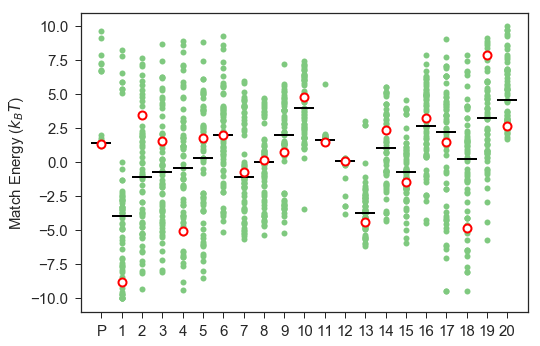

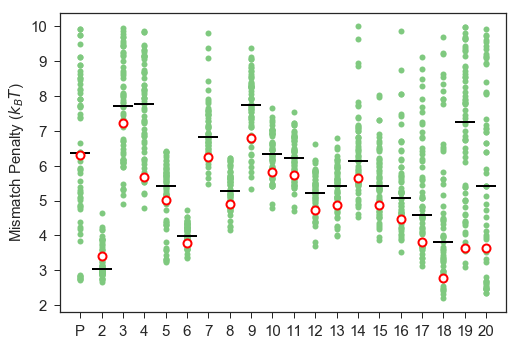

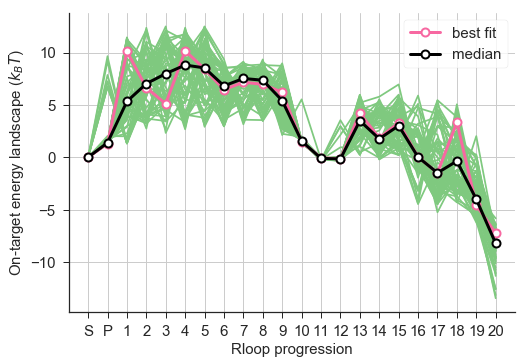

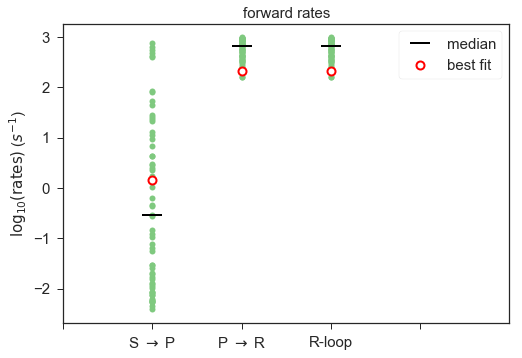

In [6]:
# --- make selection --- 
simset = selected_sims

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset,
                                                                                        Nparams=43,
                                                                                        model_id=model_id)
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]

# ---- show fluctuations in parameter sets --- 

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)

plt.figure()

for sim in simset:
    y = list(matches.loc[sim])
    x = range(len(y))
    plt.plot(x,y, marker='o',markersize=6,linestyle='', color=sns.color_palette()[0],mec=sns.color_palette()[0], alpha=1.0,label='')

y = list(matches.median())
x = range(len(y))
plt.plot(x,y,color='black',linestyle='',marker='_',lw=4,markersize =20,markeredgewidth= 2,label='median')

y = list(matches.loc[best_fit])
x = range(len(y))
plt.plot(x, y, color='#f768a1',linestyle='',marker='o', markersize =8,markerfacecolor='white', mec='r',markeredgewidth= 2,label='best fit')

ax=plt.gca()
ax.set_xticks(x)
labels = np.array(matches.columns)
labels[0]='P'
ax.set_xticklabels(labels, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Match Energy ($k_BT$)',fontsize=15);

# --- Mismatches ---
plt.figure()

for sim in simset:
    y = list(mismatches.loc[sim])
    x = range(len(y))
    plt.plot(x,y, marker='o',markersize=6,linestyle='', color=sns.color_palette()[0],mec=sns.color_palette()[0], alpha=1.0,label='')

y = list(mismatches.median())
x = range(len(y))
plt.plot(x,y,color='black',linestyle='',marker='_',lw=4,markersize =20,markeredgewidth= 2,label='median')

y = list(mismatches.loc[best_fit])
x = range(len(y))
plt.plot(x, y, color='#f768a1',linestyle='',marker='o', markersize =8,markerfacecolor='white', mec='r',markeredgewidth= 2,label='best fit')

ax=plt.gca()
ax.set_xticks(x)
labels = np.array(mismatches.columns)
labels[0]='P'
ax.set_xticklabels(labels, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Mismatch Penalty ($k_BT$)',fontsize=15);

# --- (microscopic) free-energy landscape --- 
plt.figure()
for filename in simset:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id,show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit] )

plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
             marker='o',
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(range(0,22),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Rloop progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();

# --- 10log of the forward rates --- 
plt.figure()

x=range(3)

for sim in simset:
    y = list(forward_rates.loc[sim].apply(np.log10))
    plt.plot(x,y,marker='o',markersize=6,linestyle='',mec=sns.color_palette()[0], color=sns.color_palette()[0], alpha=1.0,label='')

y = list(forward_rates.median().apply(np.log10))
plt.plot(x,y,color='black',linestyle='',marker='_',lw=4,markersize =20,markeredgewidth=2,label='median') 

y = list(forward_rates.loc[best_fit].apply(np.log10))
plt.plot(x,y,color='#f768a1',linestyle='',marker='o', lw=3,markersize =8,markerfacecolor='white',mec='r',markeredgewidth= 2,label='best fit')

plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# Can we select based on test against CHAMP data? 


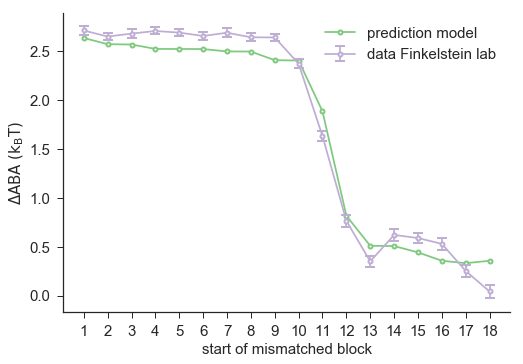

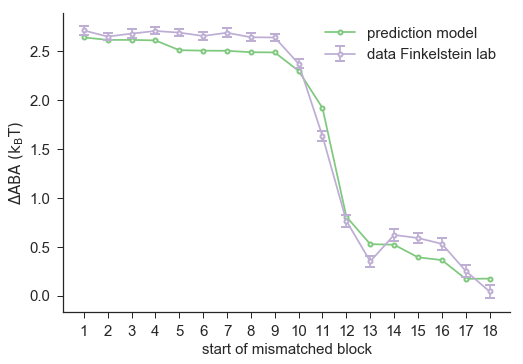

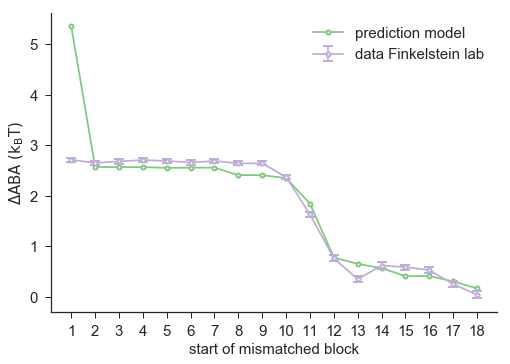

In [10]:
sys.path.append('../code_ABA_Finkelsteinlab/')
import plotting_ABA as pltABA
reload(pltABA);



# ---- load CHAMP data ------
IlyaData = pd.read_csv('../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv')


buggers=np.array([23,30,62])
for sim in selected_sims[buggers-1]:
    # ---- load parameters ----- 
    model_id = model_id
    filename = sim
    Nparams = 43
    boyle_params = plt_B.load_simm_anneal(filename, Nparams)
    
    # ---- plot comparissons ----- 
    plt.figure()
    _ = pltABA.predict_1D_mmblocks(boyle_params, model_id, T=60*10,guide_length=20);




# plt.figure()
# _ = pltABA.predict_single_mm(boyle_params,model_id)


# plt.figure()
# _ = pltABA.predict_double_mm(boyle_params,model_id)



# plt.figure()
# _ = pltABA.predict_block_mismatches(parameters=boyle_params, model_id=model_id, T=60*10,guide_length=20)

In [15]:
CHAMP_selected_by_eye = np.array([1,8,9,14,17,20,33,36,40,46,47,49,52,62])
note1 = [17,40,46,47,52]
note2 = [47]


selected_CHAMP_by_eye = selected_sims[CHAMP_selected_by_eye-1]

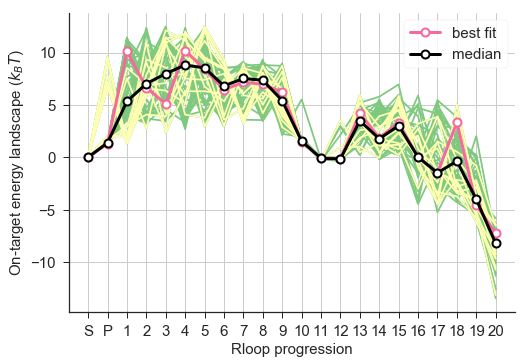

In [17]:
# --- All selected sims (based on Training only) --- 
plt.figure()
for filename in simset:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id,show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])

# --- Additionally select based on Test (CHAMP) ---- 
for filename in selected_CHAMP_by_eye:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id,show_plot=False);
    plt.plot(np.array(Energy_landscape),color="#ffffb3")
    
    
lowest_chi_squared = np.array( landscape.loc[best_fit] )




plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit');



LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
             marker='o',
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(range(0,22),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Rloop progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();

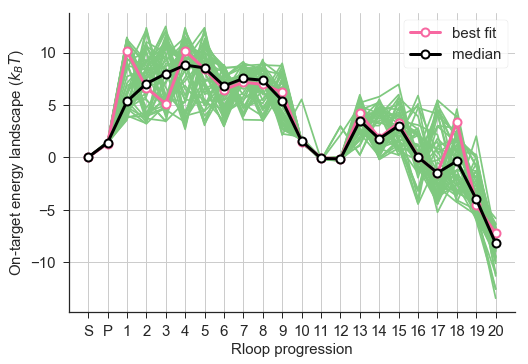

In [18]:
# --- All selected sims (based on Training only) --- 
plt.figure()
for filename in simset:
    
    if filename in selected_CHAMP_by_eye:
        continue 
        
    parameters =plt_B.load_simm_anneal(filename, Nparams)
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id,show_plot=False);
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])

    
    
lowest_chi_squared = np.array( landscape.loc[best_fit] )




plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit');



LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
             marker='o',
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(range(0,22),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Rloop progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();

## Coarse-grained Model

In [21]:
reload(cg)

<module 'coarsegrained_Model' from 'coarsegrained_Model.pyc'>

In [40]:
filename = best_fit
Nparams = 43
parameters = plt_B.load_simm_anneal(filename, Nparams)

score:
0.0788588540182


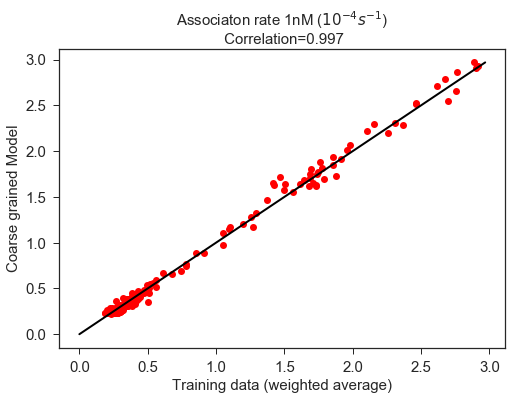

In [41]:
k_on_mat, rate_SR, rate_RP = cg.predict_coarsegrained_Model(parameters)
score,_,_ = cg.correlation_coarsegrained_Model(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True)
print 'score:'
print score

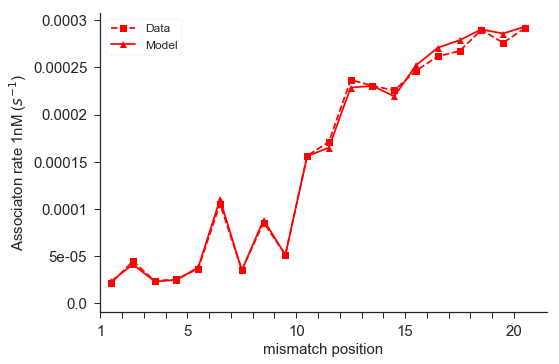

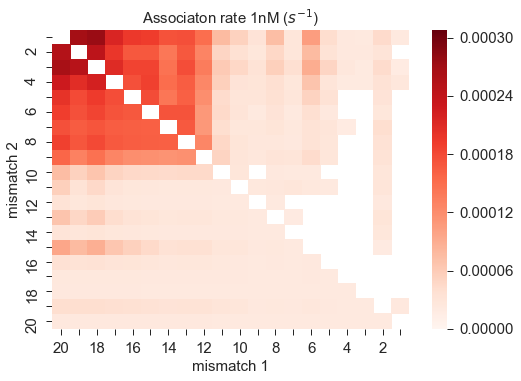

In [42]:
plt.figure()
_,_ = plt_B.plot_single_mismatches(k_on_mat ,kind='OnRate')
plt.figure()
_,_ = plt_B.plot_heatmap(k_on_mat ,kind='OnRate')


correlation:
0.999881522658


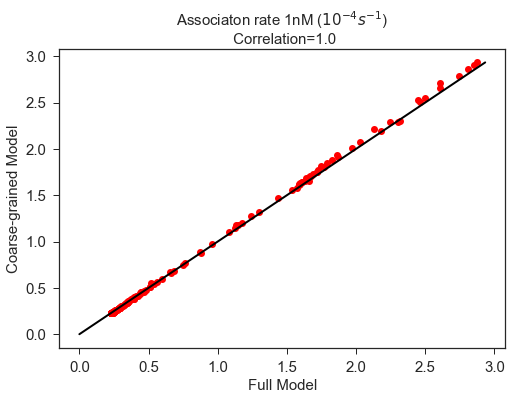

In [43]:
corr,_ = cg.Model_Model_correlation(best_model, k_on_mat, Plot=True)
ax = plt.gca()
ax.set_xlabel('Full Model')
ax.set_ylabel('Coarse-grained Model')
print 'correlation:'
print corr

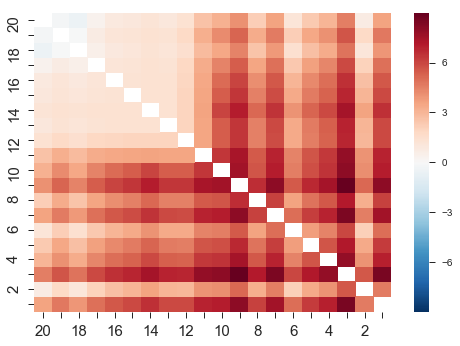

In [44]:
R = rate_SR/rate_RP

SR  = rate_SR.copy()
RP = rate_RP.copy()
for i in range(len(SR)):
    SR[i,i] = np.nan
    RP[i,i] = np.nan

R = RP/SR  
F = np.log(R)

ax = sns.heatmap(F)
plt.xticks(fontsize=15)
ax.set_xticklabels(['20', '', '18', '', '16', '', '14', '', '12', '', '10', '', '8', '', '6', '', '4', '', '2', ''])
plt.yticks(fontsize=15)
ax.set_yticklabels(['', '2', '', '4', '', '6', '', '8', '', '10', '', '12', '', '14', '', '16', '', '18', '', '20']);
# ax.invert_yaxis()
# ax.invert_xaxis()
# sns.heatmap(np.tril(R), mask=np.triu(R), vmax=np.max(np.tril(R)),vmin=np.min(np.tril(R)))

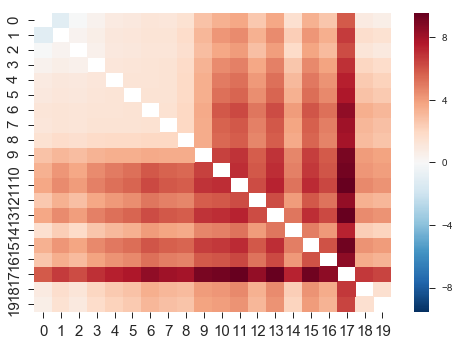

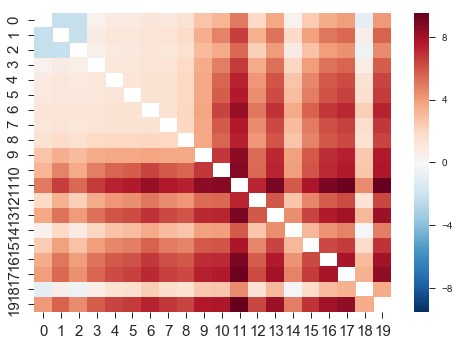

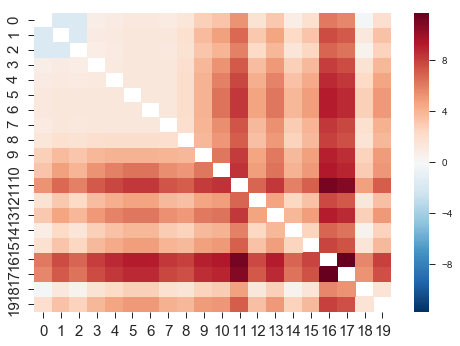

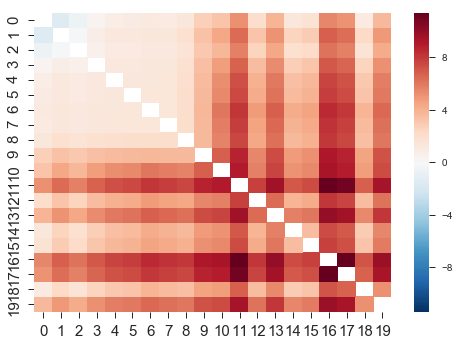

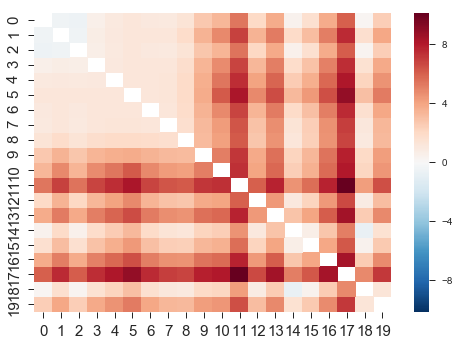

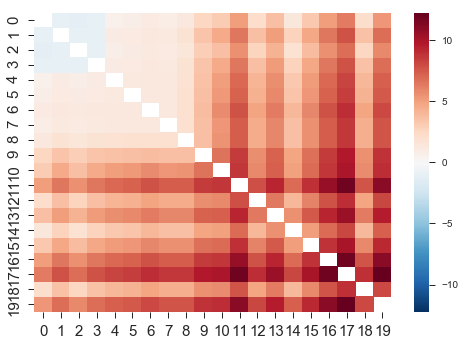

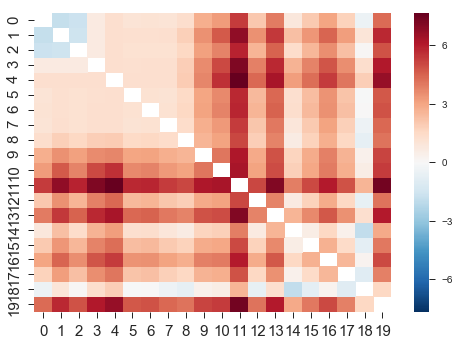

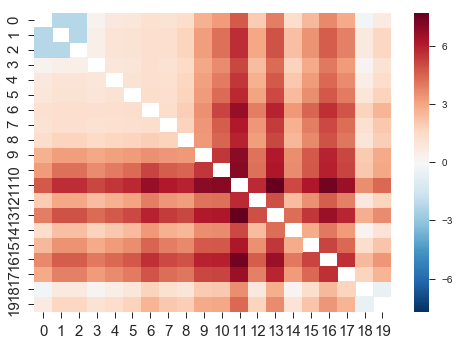

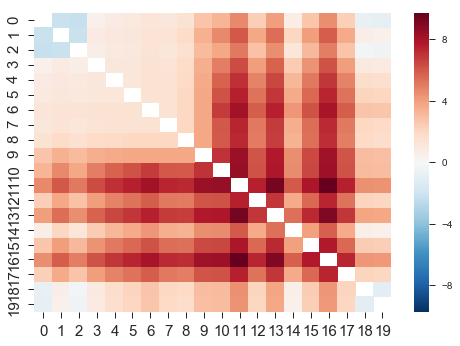

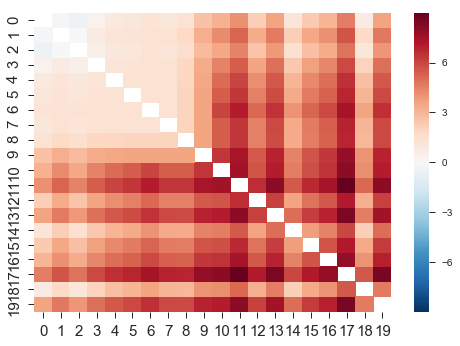

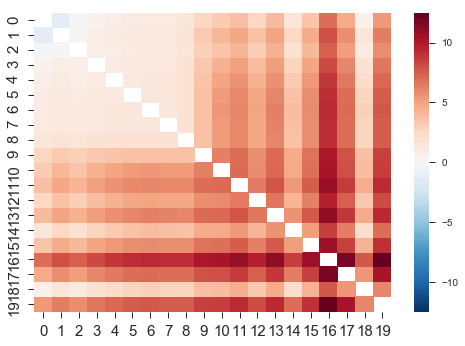

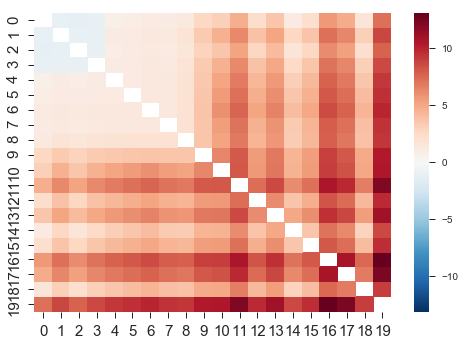

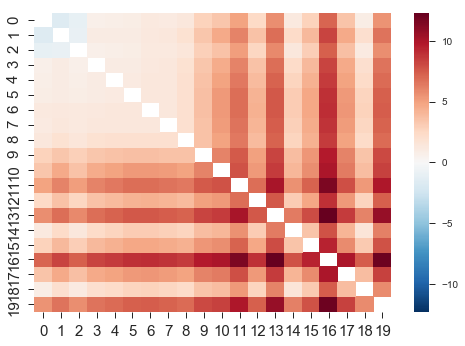

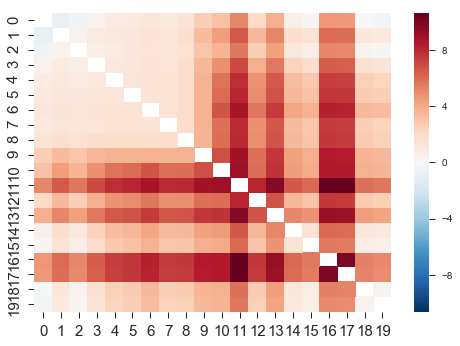

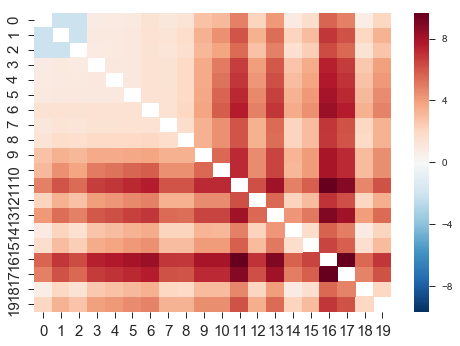

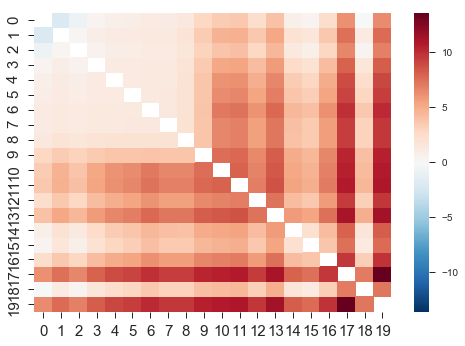

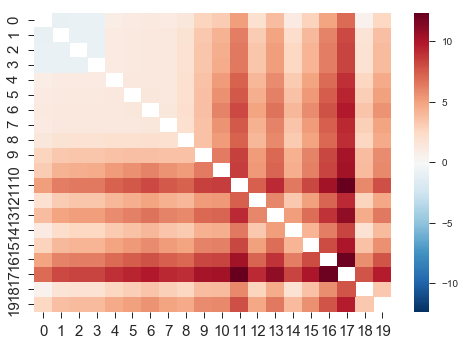

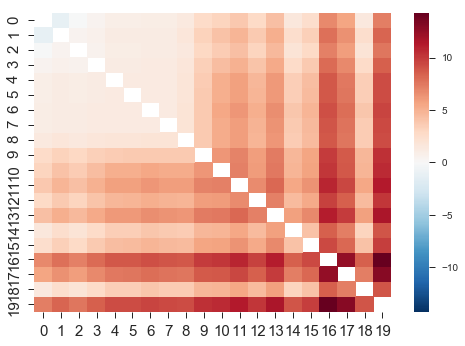

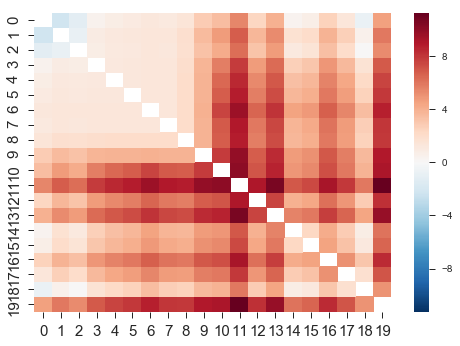

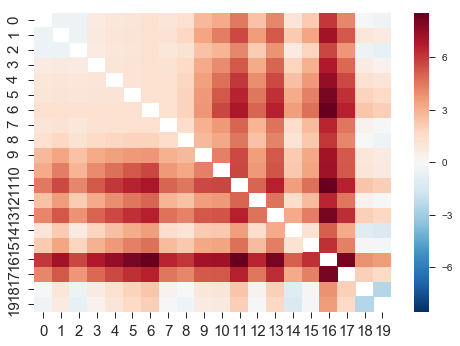

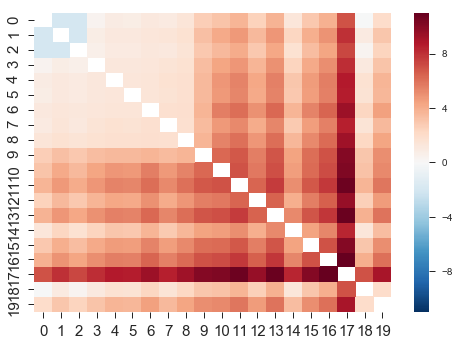

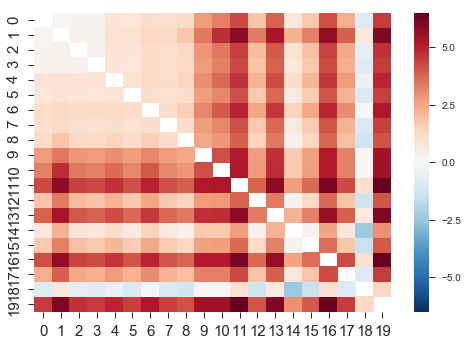

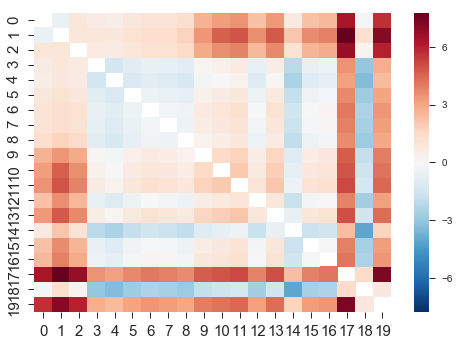

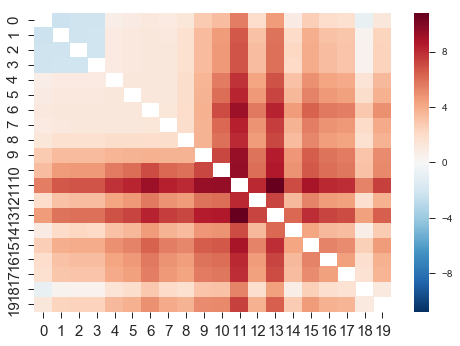

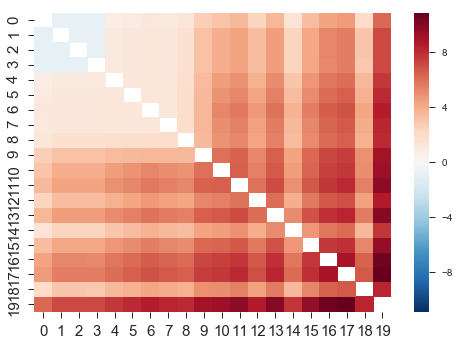

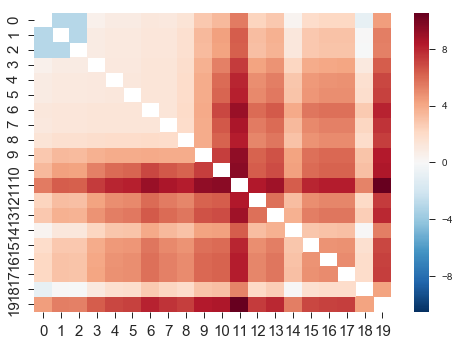

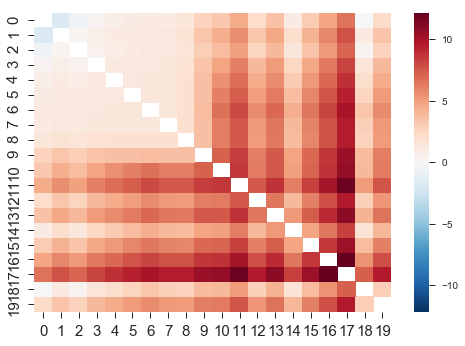

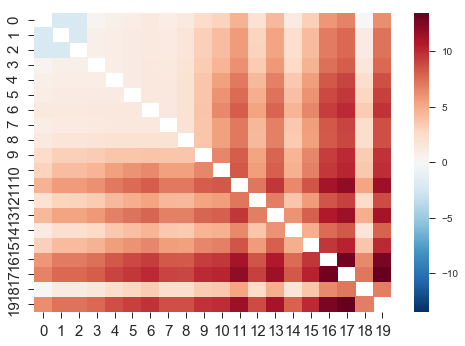

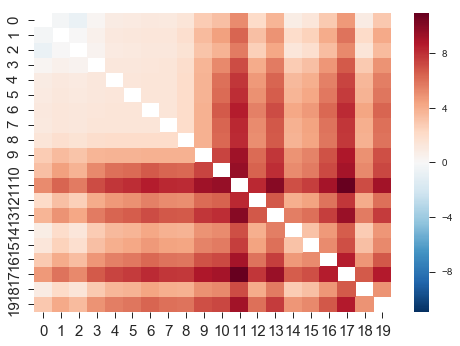

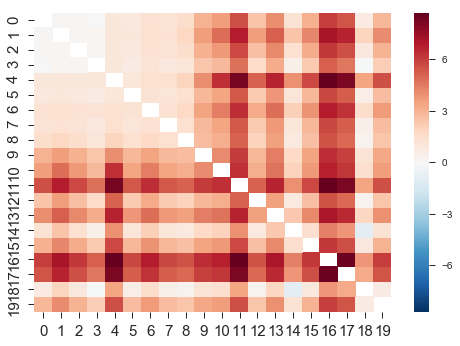

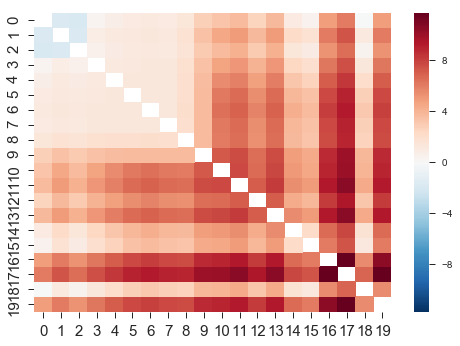

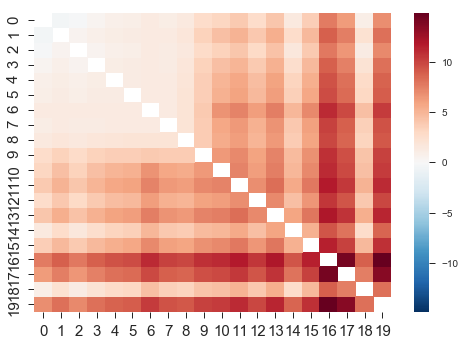

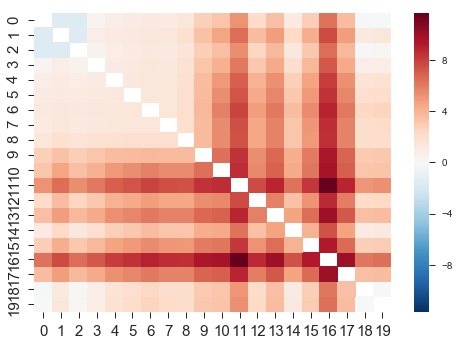

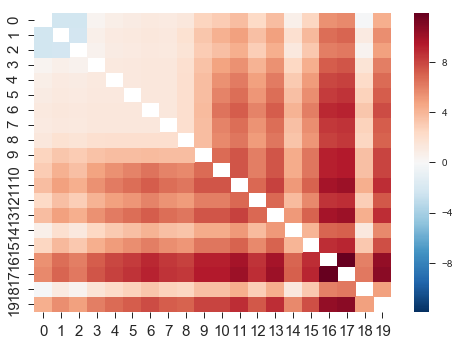

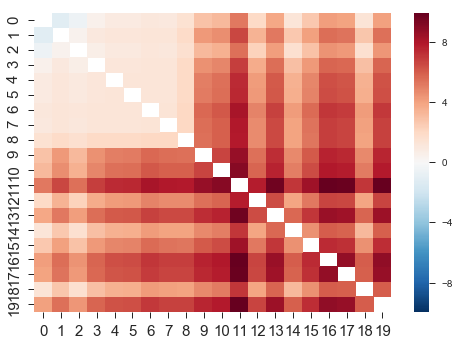

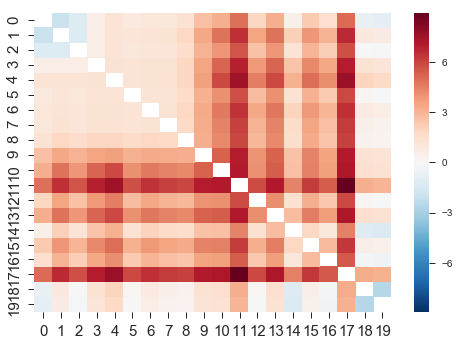

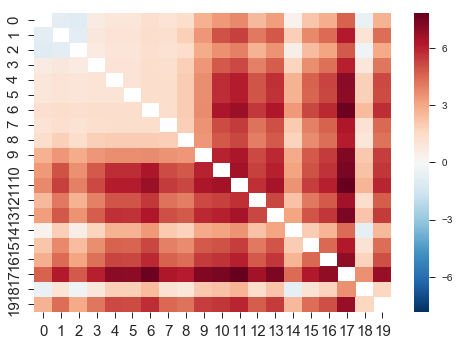

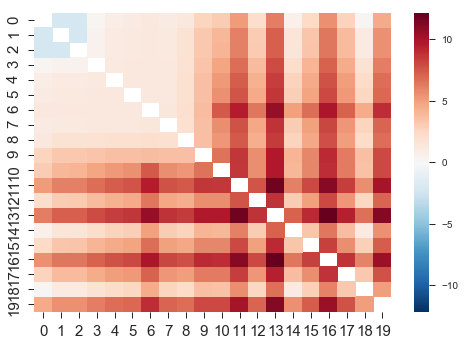

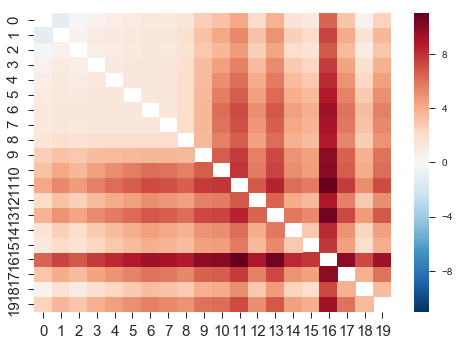

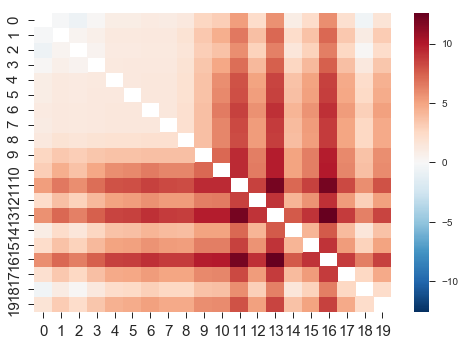

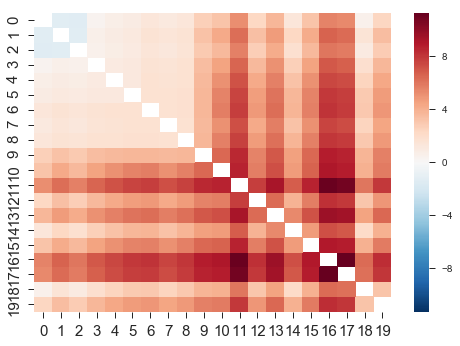

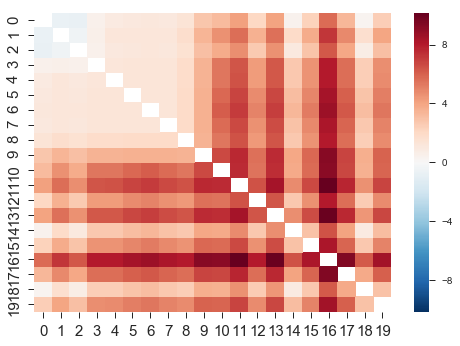

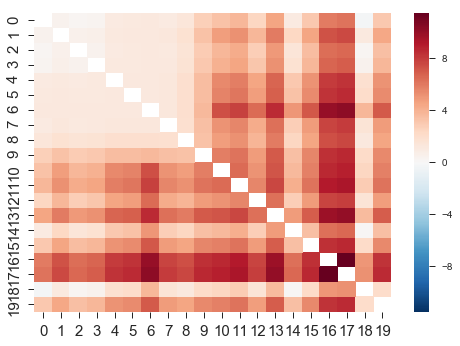

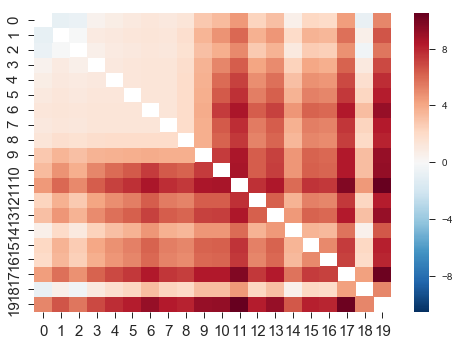

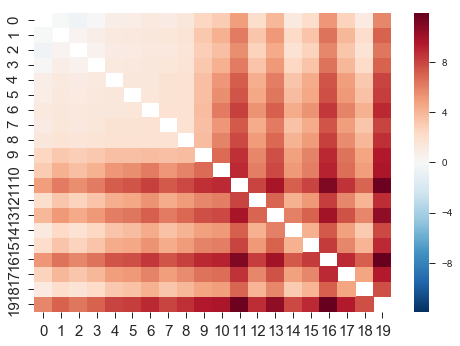

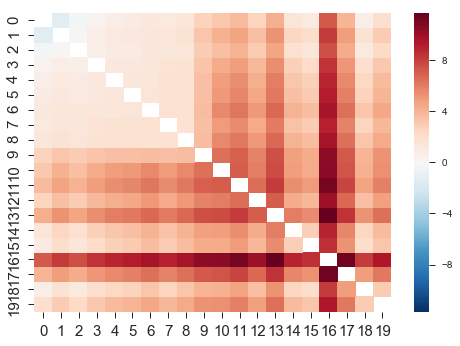

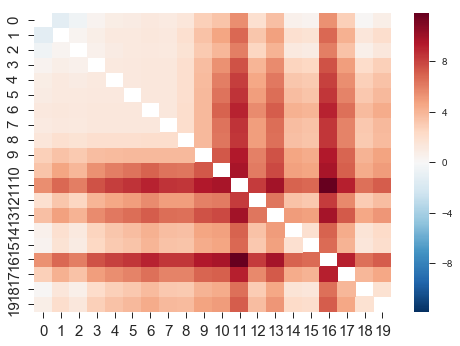

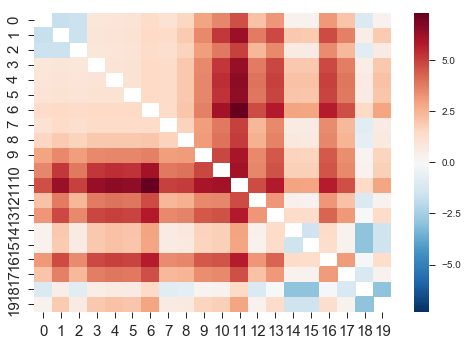

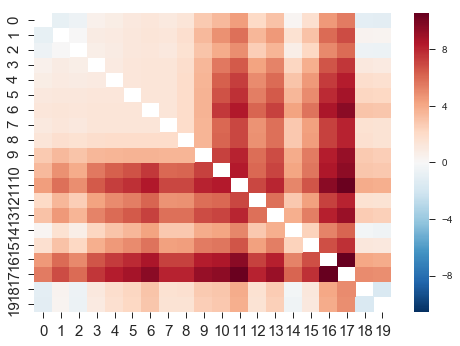

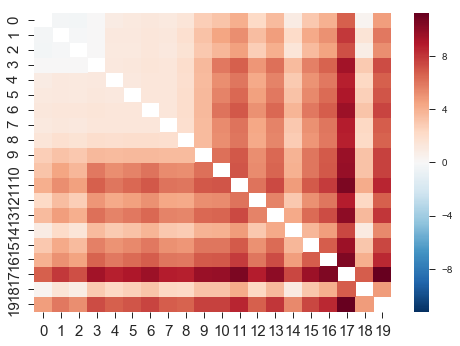

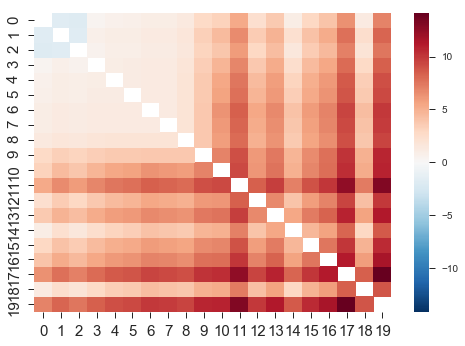

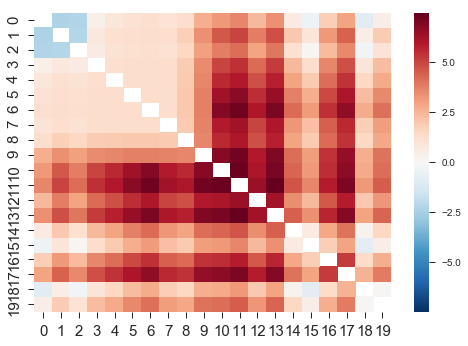

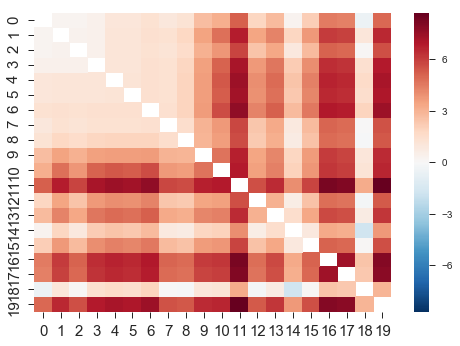

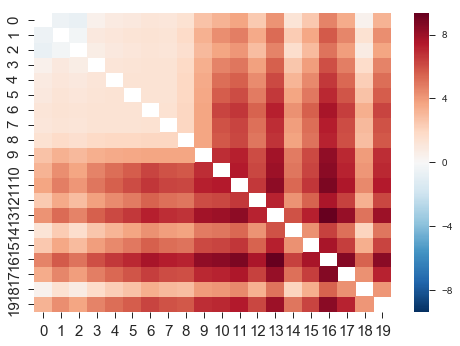

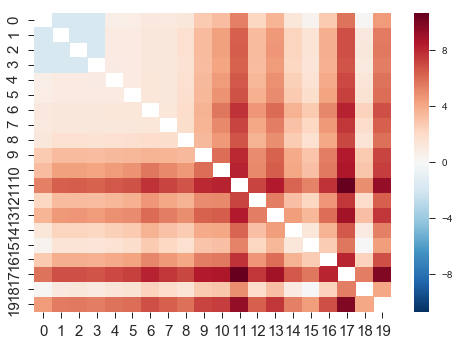

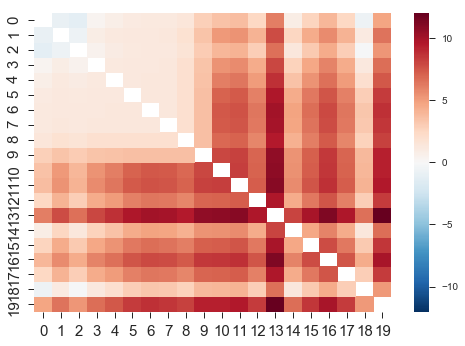

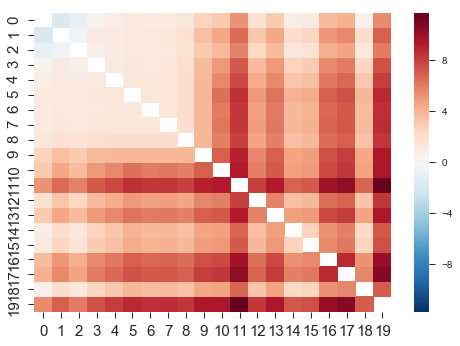

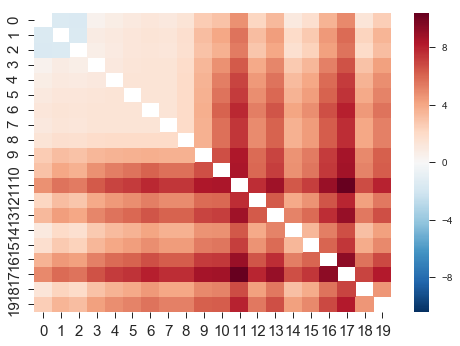

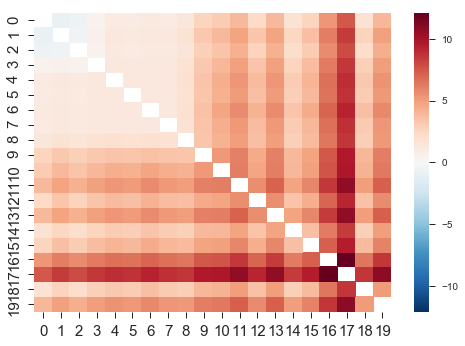

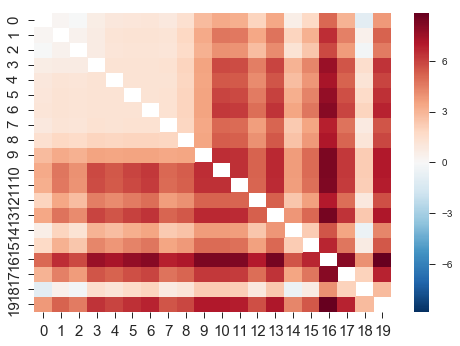

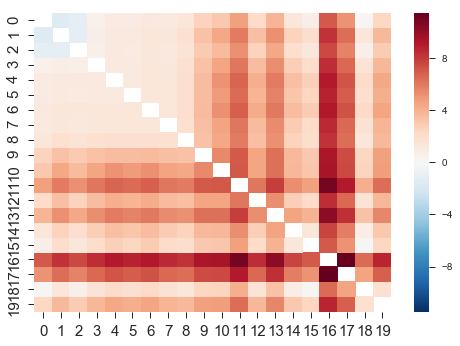

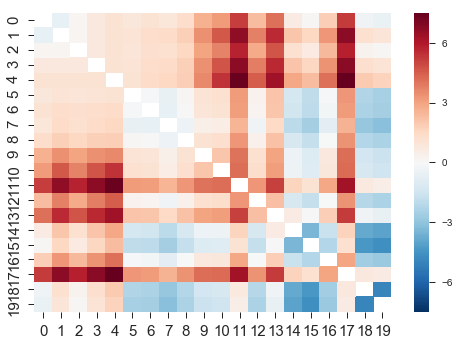

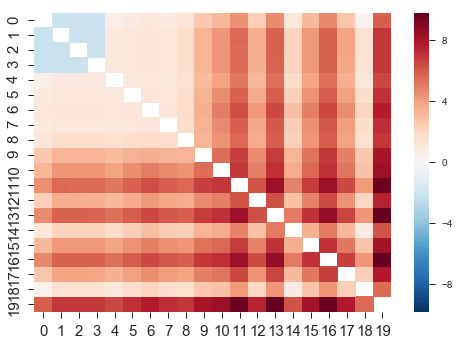

In [45]:

    
    
fitnmbr = np.array([23,30,62])
for sim in selected_sims:
    filename = sim
    Nparams = 43
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    k_on_mat, rate_SR, rate_RP = cg.predict_coarsegrained_Model(parameters)

#     _,_ = plt_B.plot_heatmap(k_on_mat ,kind='OnRate')
    SR  = rate_SR.copy()
    RP = rate_RP.copy()
    for i in range(len(SR)):
        SR[i,i] = np.nan
        RP[i,i] = np.nan
        
    R = RP/SR  
    F = np.log(R)
    plt.figure()
    sns.heatmap(F)

#     ax = sns.heatmap(SR)
    plt.xticks(fontsize=15)
    ax.set_xticklabels(['20', '', '18', '', '16', '', '14', '', '12', '', '10', '', '8', '', '6', '', '4', '', '2', ''])
    plt.yticks(fontsize=15)
    ax.set_yticklabels(['', '2', '', '4', '', '6', '', '8', '', '10', '', '12', '', '14', '', '16', '', '18', '', '20']);

(-1e-05, 0.0005)

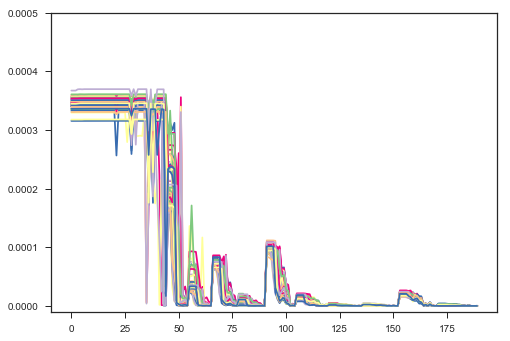

In [37]:

buggers = [23,30,62]
for nmbr, sim in enumerate(selected_sims):
    if (sim in selected_CHAMP_by_eye) or ((nmbr+1) in buggers):
        continue
        
    
    filename = sim
    Nparams = 43
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    k_on_mat, rate_SR, rate_RP = cg.predict_coarsegrained_Model(parameters)

#     _,_ = plt_B.plot_heatmap(k_on_mat ,kind='OnRate')

    SR  = rate_SR.copy()
    RP = rate_RP.copy()
    for i in range(len(SR)):
        SR[i,i] = np.nan
        RP[i,i] = np.nan
        
        
    current_fit = []
    counter = 0 
    for i in range(len(SR)):
        counter += i+1 
#         plt.axvline(count,color='black')
        for j in range(0,i):
            current_fit.append(SR[i,j])
            
    plt.plot(range(len(current_fit)),current_fit)
plt.ylim(-0.00001,0.0005)
# plt.xlim(0,20)

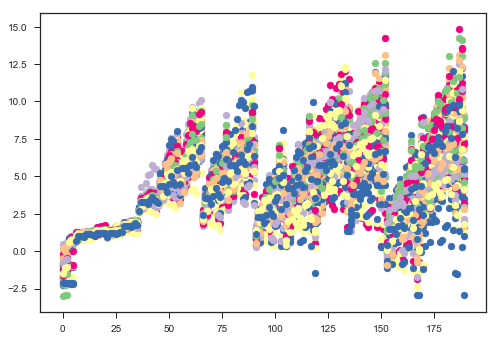

In [38]:
buggers = [23,30,62]
for nmbr, sim in enumerate(selected_sims):
    if (sim in selected_CHAMP_by_eye) or ((nmbr+1) in buggers):
        continue
    filename = sim
    Nparams = 43
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    k_on_mat, rate_SR, rate_RP = cg.predict_coarsegrained_Model(parameters)

#     _,_ = plt_B.plot_heatmap(k_on_mat ,kind='OnRate')

    SR  = rate_SR.copy()
    RP = rate_RP.copy()
    for i in range(len(RP)):
        SR[i,i] = np.nan
        RP[i,i] = np.nan
        
    
    F = np.log(RP/SR)
    
    current_fit = []
    counter = 0 
    for i in range(len(F)):
        counter += i+1 
#         plt.axvline(count,color='black')
        for j in range(0,i):
            current_fit.append(F[i,j])
            
    plt.scatter(range(len(current_fit)),current_fit)
# plt.ylim(-0.00001, 0.25)
# plt.xlim(50,75)

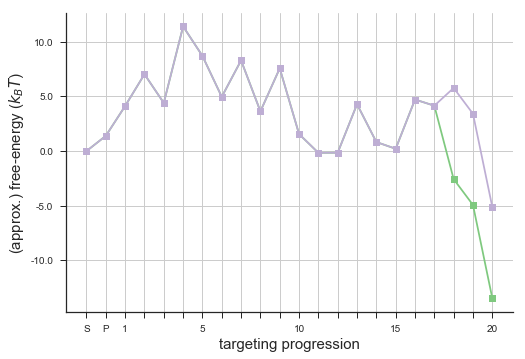

In [189]:

filename = selected_sims[22]
parameters = plt_B.load_simm_anneal(filename, Nparams)


plt.figure()
ax = plt.gca()

_ = FreeEnergy.plot_landscape(parameters,model_id,mismatch_positions=[],axis=ax)
_ = FreeEnergy.plot_landscape(parameters,model_id,mismatch_positions=[18], axis=ax)

In [188]:
cg.calc_coarsegrained_Model(parameters, mismatch_positions=[18,19], model_id='general_energies_no_kPR')

12


(0.00019259162729169961, 0.00034803981533709267, 0.00090473234559299465)

In [126]:
SR[0,1]

0.00033617476536502755